<a href="https://colab.research.google.com/github/apoorvyadav1111/Oreilly_Handson_Machine_learning_book/blob/main/Handson_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

Text(0, 0.5, 'y')

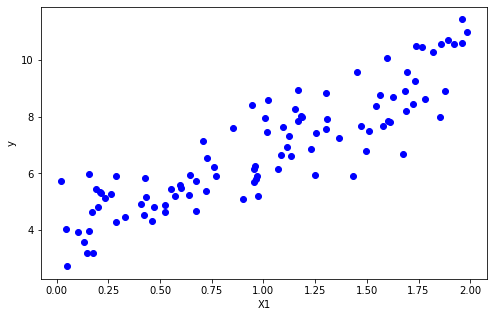

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,c='b')
plt.xlabel('X1')
plt.ylabel('y')

In [ ]:
X_b = np.c_[np.ones((100,1)),X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.78902047],
       [3.05810563]])

In [ ]:
 X_new = np.array([[0], [2]])
 X_new_b = np.c_[np.ones((2,1)),X_new]
 y_pred = X_new_b.dot(theta_best)
 print(y_pred)

[[3.78902047]
 [9.90523173]]


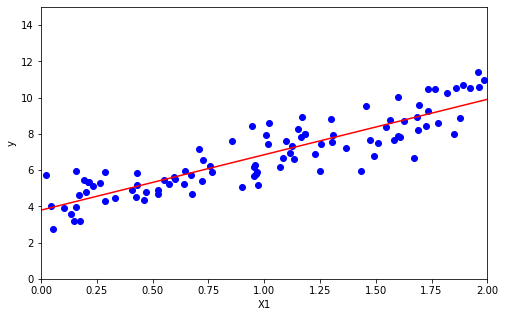

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,c='b')
plt.xlabel('X1')
plt.ylabel('y')
plt.plot(X_new,y_pred,"r-")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
##Using sklearn
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.78902047]), array([[3.05810563]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.78902047],
       [9.90523173]])

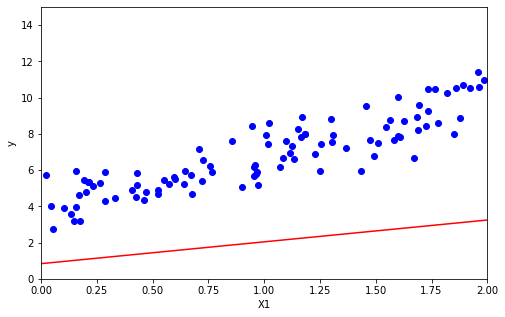

In [ ]:
eta = 0.001  # learning rate
n_iterations = 100
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if True:
      clear_output(wait=True)
      plt.figure(figsize=(8,5))
      plt.scatter(X,y,c='b')
      plt.xlabel('X1')
      plt.ylabel('y')
      y_pred = X_new_b.dot(theta)
      plt.plot(X_new,y_pred,"r-")
      plt.axis([0,2,0,15])
      plt.show()

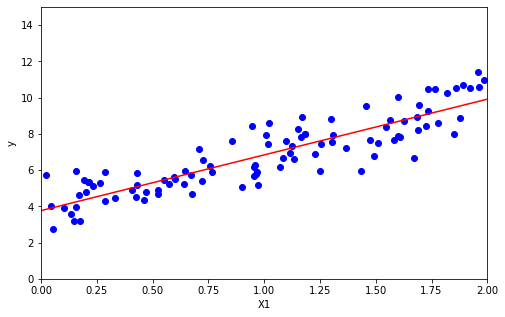

In [ ]:
n_epochs = 10
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta * gradients
    if True:
      clear_output(wait=True)
      plt.figure(figsize=(8,5))
      plt.scatter(X,y,c='b')
      plt.xlabel('X1')
      plt.ylabel('y')
      y_pred = X_new_b.dot(theta)
      plt.plot(X_new,y_pred,"r-")
      plt.axis([0,2,0,15])
      plt.show()

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

(-3.0, 3.0, 0.0, 10.0)

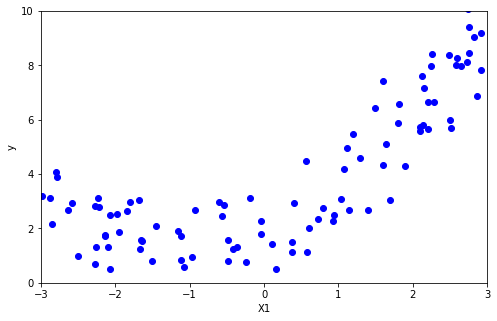

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,c='b')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([-3,3,0,10])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-2.57951194]), array([-2.57951194,  6.65388186]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.80436619]), array([[1.01781768, 0.51329183]]))

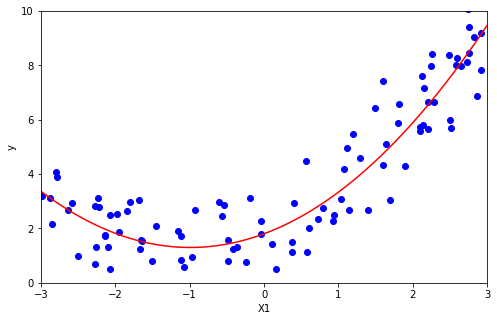

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X,y,c='b')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([-3,3,0,10])
y_pred = lin_reg.predict(X_poly)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new,y_new,"r-")

In [ ]:
#Plotting learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  train_errors,val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_pred = model.predict(X_train[:m])
    y_test_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
    val_errors.append(mean_squared_error(y_test,y_test_pred))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

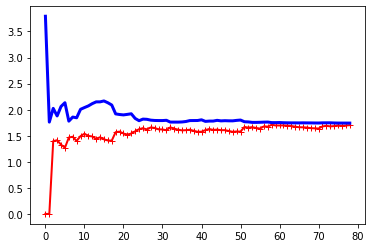

In [ ]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

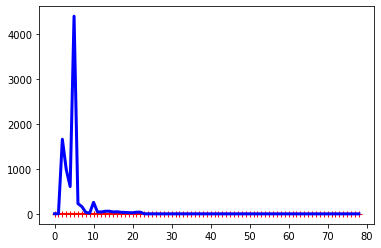

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
                                  ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                  ('lin_reg',LinearRegression()),
])

plot_learning_curve(polynomial_regression,X,y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
                        ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                        ("std_scaler",StandardScaler())
])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_test)

sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_test,y_val_predict)
  if val_error<minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Logistic Regression

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
 X = iris['data'][:,3:] #taking only petal width
 y = (iris['target']==2).astype(np.int) # 1 if Iris Virginica

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

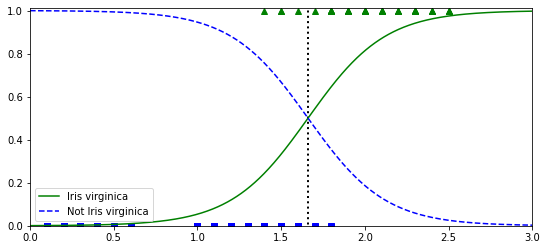

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(9,4))
plt.plot(X[y==0],y[y==0],'bs')
plt.plot(X[y==1],y[y==1],'g^')
plt.plot([decision_boundary,decision_boundary],[-1,2],'k:',linewidth=2)
plt.plot(X_new,y_proba[:,-1],'g-',label='Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris virginica')
plt.axis([0.0,3.0,0.0,1.01])
plt.legend()


In [ ]:
print(decision_boundary)

[1.66066066]


In [ ]:
log_reg.predict([[1.5],[1.7]])

array([0, 1])

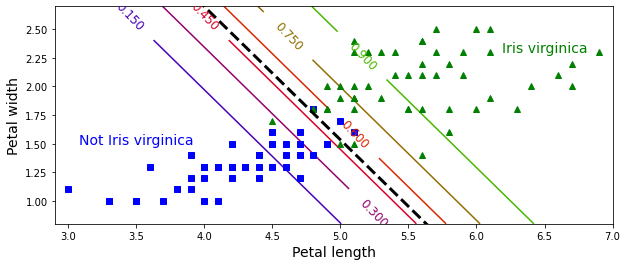

In [ ]:
X = iris['data'][:,(2,3)] # two features
y = (iris['target']==2).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X,y)
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
boundary

array([ 3.97942458, -0.79448756])

## Softmax Regression

In [ ]:
import matplotlib

In [ ]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5,2]]),softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))

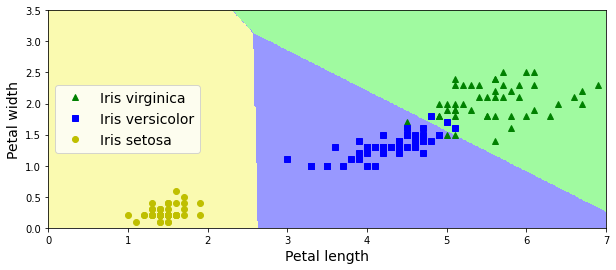

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Exercises
#### Batch Grad Descent with Early Stopping for Softmax

In [ ]:
import numpy as np

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [ ]:
Xb = np.c_[np.ones([len(X),1]),X]

In [ ]:
np.random.seed(2042)

In [ ]:
test_ratio = 0.2
validaton_ratio = 0.2
total_size = len(Xb)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validaton_ratio)
train_size = total_size - test_size - validation_size

rnd_idx = np.random.permutation(total_size)

X_train = Xb[rnd_idx[:train_size]]
y_train = y[rnd_idx[:train_size]]

X_val = Xb[rnd_idx[train_size:-test_size]]
y_val = y[rnd_idx[train_size:-test_size]]

X_test = Xb[rnd_idx[-test_size:]]
y_test = y[rnd_idx[-test_size:]]

In [ ]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)

  y_one_hot = np.zeros((m,n_classes))
  y_one_hot[np.arange(m),y] = 1
  return y_one_hot

In [ ]:
y_train_one_hot = to_one_hot(y_train)
y_test_one_hot = to_one_hot(y_test)
y_val_one_hot = to_one_hot(y_val)

In [ ]:
def softmax(logits):
  exp = np.exp(logits)
  exp_sums = np.sum(exp,axis=1,keepdims=True)
  return exp/exp_sums

In [ ]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [ ]:
eta = 0.01
n_iter = 5001
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs,n_outputs)

for iter in range(n_iter):
  logits = X_train.dot(theta)
  y_prob = softmax(logits)
  loss = -np.mean(np.sum(y_train_one_hot*np.log(y_prob+epsilon),axis=1))
  error = y_prob - y_train_one_hot
  if iter%500 == 0:
    print(iter,loss)
  
  grads = 1/m * X_train.T.dot(error)
  theta = theta - eta*grads

0 1.7822323067358647
500 0.8628462265114629
1000 0.716349179402513
1500 0.6229368996437149
2000 0.5601599013524355
2500 0.5150854292438578
3000 0.48079271109443317
3500 0.45348742466645525
4000 0.4309753916216716
4500 0.4119134957650927
5000 0.3954355155236652
